<a href="https://colab.research.google.com/github/FunmiSomoye/School-Projects/blob/master/Statistics_%26_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summative Assessment - Data Analytics and Visualization

### Funmi Somoye

This assessment will cover the following:
- Importing the data and dealing with missing values
- Exploring the data and producing some simple visualizations
- Sampling and comparing samples
- Looking for correlation
- Using regression to predict power consumption

It's split into tasks, each in its own section. Write your code and answers in the spaces provided. Feel free to add cells and import any libraries you'll require.

## The data

The data we'll be using in this assesssment was downloaded from data.world (https://data.world/databeats/household-power-consumption), a subset of a larger dataset available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#).

It may look familiar to some of you!

Here's the description of the data from the site:

<b>Data Set Information</b>

This household electricity consumption dataset contains 260,640 measurements gathered between January 2007 and June 2007 (6 months). It is a subset of a larger, original archive that contains 2,075,259 measurements gathered between December 2006 and November 2010 (47 months).

<b>Attribute Information</b>

date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
global_active_power: household global minute-averaged active power (in kilowatt)
global_reactive_power: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Assessment Flow

## Task 1 - Getting the data!

*The* data has not been downloaded for you. Save the file and add the correct file path for your file.

In [ ]:
file_path = 'household_power_consumption-household_power_consumption.csv'

It is comma separated, but has a major issue you'll have to deal with before you can begin working with it: missing values are marked with a '?'. You'll need to remove all rows with missing values and make sure the columns are the right type before we move on. This is a classic example of a problem whose solution isn't worth memorizing, so if you're struggling take a look around on stack overflow or elsewhere for others who've solved the same problem!

In [ ]:
# Import the libraries you'll be using and load the data into a pandas dataframe here

In [ ]:
import matplotlib.pyplot as plt
from numpy import arange
import scipy.stats as scs
import pandas as pd
import seaborn as sns
import random as rnd
import numpy as np
from matplotlib.legend import Legend #for legends
import math #Import Python math module for mathematical computations like squareroot
import statsmodels.api as sm #import statsmodel module for qqplot
from sklearn import model_selection, linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
%matplotlib inline

In [ ]:
data = pd.read_csv('household_power_consumption-household_power_consumption.csv', sep=',')

In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [ ]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0
260639,30/6/2007,23:59:00,2.548,0.354,239.25,10.6,0,1,17.0


In [ ]:
data.info() #see datatypes of variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256869 entries, 0 to 260639
Data columns (total 10 columns):
Date                     256869 non-null object
Time                     256869 non-null object
Global_active_power      256869 non-null float64
Global_reactive_power    256869 non-null float64
Voltage                  256869 non-null float64
Global_intensity         256869 non-null float64
Sub_metering_1           256869 non-null float64
Sub_metering_2           256869 non-null float64
Sub_metering_3           256869 non-null float64
Datetime                 256869 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 21.6+ MB


Convert all columns except Date and Time to floats.
First remove missing values

From problem prompt, missing values are marked with a '?'

In [ ]:
data = data.loc[data['Global_active_power']!="?"] # Removing missing records

In [ ]:
#Check to confirm that missing values have been removed
data.isnull().sum(axis=0) 

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
#MAke sure the columns are the right type
data[data.columns[2:]] = data[data.columns[2:]].astype(float) #convert non-date columns to float

In [ ]:
data.info() #confirm datatype changes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256869 entries, 0 to 260639
Data columns (total 9 columns):
Date                     256869 non-null object
Time                     256869 non-null object
Global_active_power      256869 non-null float64
Global_reactive_power    256869 non-null float64
Voltage                  256869 non-null float64
Global_intensity         256869 non-null float64
Sub_metering_1           256869 non-null float64
Sub_metering_2           256869 non-null float64
Sub_metering_3           256869 non-null float64
dtypes: float64(7), object(2)
memory usage: 19.6+ MB


Now handle Date columns

Date is an object. Convert Date and Time to pandas datetime

In [ ]:
#create a new column for datetime from Date and Time
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True, errors='ignore')

Now, we can start looking at this data. Assuming you've called your dataframe 'df', run df.head() and df.describe() to see what we're working with. Remember, at this stage you shouldn't have missing data.

In [ ]:
# Look at the data you've loaded

In [ ]:
data.head() 

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00
3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00
4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00


In [ ]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
260635,30/6/2007,23:55:00,2.880,0.360,239.01,12.0,0.0,0.0,18.0,2007-06-30 23:55:00
260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0.0,0.0,17.0,2007-06-30 23:56:00
260637,30/6/2007,23:57:00,2.882,0.280,239.05,12.0,0.0,0.0,18.0,2007-06-30 23:57:00
260638,30/6/2007,23:58:00,2.660,0.290,238.98,11.2,0.0,0.0,18.0,2007-06-30 23:58:00
260639,30/6/2007,23:59:00,2.548,0.354,239.25,10.6,0.0,1.0,17.0,2007-06-30 23:59:00


We know from the above that the data is continuous, and time-series, thus, there'll be no unique values in any of the columns.

In [ ]:
data.describe() #data summary statistics

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.296000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000
50%,0.564000,0.104000,239.610000,2.600000,0.000000,0.000000,0.000000
75%,1.606000,0.194000,241.810000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


Look at the count field - lots of rows! Try running something like df.plot() - it takes a while. Imagine a dataset with 25 million rows. If we're going to be exploring and playing around, we might not want to wait for things to complete. So, sampling! Your next task will be to generate a smaller dataset for data exploration

In [ ]:
data.shape #see size of cleaned dataframe

(256869, 10)

In [ ]:
data.count() #see count of each column in cleaned dataframe

Date                     256869
Time                     256869
Global_active_power      256869
Global_reactive_power    256869
Voltage                  256869
Global_intensity         256869
Sub_metering_1           256869
Sub_metering_2           256869
Sub_metering_3           256869
Datetime                 256869
dtype: int64

Test .plot() on dataframe

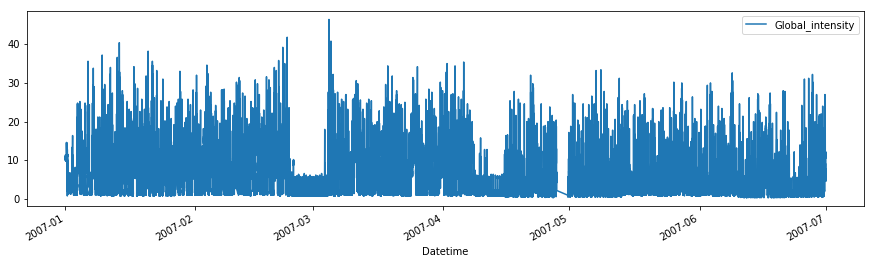

In [ ]:
data.plot(x='Datetime', y='Global_intensity', figsize=(15, 4))

## Task 2: Subsampling

Create two new dataframes, one with the first 1000 rows of df and another with 1000 rows starting from 75,000. 

In [ ]:
# Answer here

Create new dataframe from first 1000 rows

In [ ]:
subset_1=data.iloc[0:1000,] #Select first 1000 rows of data
subset_2=data.iloc[75000:76000,] #Select 1000 rows of data from index 75000

In [ ]:
subset_1.count() #confirm that 1000 rows has been selected

Date                     1000
Time                     1000
Global_active_power      1000
Global_reactive_power    1000
Voltage                  1000
Global_intensity         1000
Sub_metering_1           1000
Sub_metering_2           1000
Sub_metering_3           1000
Datetime                 1000
dtype: int64

In [ ]:
subset_1 #view data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00
3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00
4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00
5,1/1/07,0:05:00,2.550,0.100,241.83,10.4,0.0,0.0,0.0,2007-01-01 00:05:00
6,1/1/07,0:06:00,2.534,0.096,241.07,10.4,0.0,0.0,0.0,2007-01-01 00:06:00
7,1/1/07,0:07:00,2.484,0.000,241.29,10.2,0.0,0.0,0.0,2007-01-01 00:07:00
8,1/1/07,0:08:00,2.468,0.000,241.23,10.2,0.0,0.0,0.0,2007-01-01 00:08:00
9,1/1/07,0:09:00,2.486,0.000,242.18,10.2,0.0,0.0,0.0,2007-01-01 00:09:00


In [ ]:
subset_2.count() #confirm that 1000 rows has been selected

Date                     1000
Time                     1000
Global_active_power      1000
Global_reactive_power    1000
Voltage                  1000
Global_intensity         1000
Sub_metering_1           1000
Sub_metering_2           1000
Sub_metering_3           1000
Datetime                 1000
dtype: int64

In [ ]:
subset_2 #view data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
75002,22/2/2007,2:02:00,2.286,0.046,240.42,9.4,0.0,0.0,0.0,2007-02-22 02:02:00
75003,22/2/2007,2:03:00,2.284,0.048,240.33,9.4,0.0,0.0,0.0,2007-02-22 02:03:00
75004,22/2/2007,2:04:00,2.406,0.000,240.12,10.0,0.0,0.0,0.0,2007-02-22 02:04:00
75005,22/2/2007,2:05:00,2.432,0.046,238.68,10.2,0.0,0.0,0.0,2007-02-22 02:05:00
75006,22/2/2007,2:06:00,2.382,0.048,238.65,10.0,0.0,0.0,0.0,2007-02-22 02:06:00
75007,22/2/2007,2:07:00,2.330,0.048,238.81,9.6,0.0,0.0,0.0,2007-02-22 02:07:00
75008,22/2/2007,2:08:00,2.340,0.050,239.31,9.6,0.0,0.0,0.0,2007-02-22 02:08:00
75009,22/2/2007,2:09:00,2.366,0.056,240.79,9.8,0.0,0.0,0.0,2007-02-22 02:09:00
75010,22/2/2007,2:10:00,2.366,0.058,241.00,9.8,0.0,0.0,0.0,2007-02-22 02:10:00
75011,22/2/2007,2:11:00,2.366,0.058,241.13,9.8,0.0,0.0,0.0,2007-02-22 02:11:00


In [ ]:
data.iloc[75000:75005,] #just to confirm that ID index 75,000 is actually missing

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
75002,22/2/2007,2:02:00,2.286,0.046,240.42,9.4,0.0,0.0,0.0,2007-02-22 02:02:00
75003,22/2/2007,2:03:00,2.284,0.048,240.33,9.4,0.0,0.0,0.0,2007-02-22 02:03:00
75004,22/2/2007,2:04:00,2.406,0.000,240.12,10.0,0.0,0.0,0.0,2007-02-22 02:04:00
75005,22/2/2007,2:05:00,2.432,0.046,238.68,10.2,0.0,0.0,0.0,2007-02-22 02:05:00
75006,22/2/2007,2:06:00,2.382,0.048,238.65,10.0,0.0,0.0,0.0,2007-02-22 02:06:00


Do you think the first 1000 rows will give a good picture of the whole dataset? Find the mean and std dev for both of your small datasets. Do they match? Do they reflect the statistics for the dataset as a whole? Write your answers to these questions in a cell below the code you use to create and investigate these new dataframes.

In [ ]:
# Answer here - explain your code and reasoning with extra cells for explanation.

#### Compute the means & std of sample datasets

#### Means

In [ ]:
data_num=data.iloc[:, 2:9]#select only columns containing numbers for whole data

In [ ]:
#Compute and print means

#Compute stds of whole dataset
print('Whole data\n') #set a heading for differentiation
print(data_num.mean()) #compute mean across numeric variables entire dataframe

#compute mean for first 1000 rows
print('\nSubset_1\n')   #set a heading for differentiation
print(subset_1.mean()) #compute mean across entire dataframe

#compute mean for 1000 rows from i=75000
print('\nSubset_2\n')  #set a heading for differentiation
print(subset_2.mean())#compute mean across entire dataframe

Whole data

Global_active_power        1.164937
Global_reactive_power      0.123729
Voltage                  239.208981
Global_intensity           4.974755
Sub_metering_1             1.332481
Sub_metering_2             1.670610
Sub_metering_3             5.831825
dtype: float64

Subset_1

Global_active_power        2.384750
Global_reactive_power      0.101824
Voltage                  240.421420
Global_intensity           9.874600
Sub_metering_1             0.000000
Sub_metering_2             0.246000
Sub_metering_3             3.161000
dtype: float64

Subset_2

Global_active_power        1.817320
Global_reactive_power      0.086288
Voltage                  239.814120
Global_intensity           7.574400
Sub_metering_1             0.000000
Sub_metering_2             0.249000
Sub_metering_3             6.926000
dtype: float64


There are clearly differences in the means of the samples, as compared with the means of the whole dataset

#### STDs

In [ ]:
#Compute and print standard deviations

#Compute stds of whole dataset
print('Whole data\n') #set a heading for differentiation
print(data_num.std()) #compute std across numeric variables in entire dataframe

#compute mean for first 1000 rows
print('\nSubset_1\n') #set a heading for differentiation
print(subset_1.std()) #compute std across entire dataframe

#compute mean for 1000 rows from i=75000
print('\nSubset_2\n') #set a heading for differentiation
print(subset_2.std()) #compute std across entire dataframe

Whole data

Global_active_power      1.181832
Global_reactive_power    0.111872
Voltage                  3.592793
Global_intensity         4.999493
Sub_metering_1           6.704970
Sub_metering_2           6.631361
Sub_metering_3           8.186709
dtype: float64

Subset_1

Global_active_power      0.573988
Global_reactive_power    0.091648
Voltage                  2.011932
Global_intensity         2.345493
Sub_metering_1           0.000000
Sub_metering_2           0.545694
Sub_metering_3           6.738582
dtype: float64

Subset_2

Global_active_power      1.172717
Global_reactive_power    0.074975
Voltage                  2.102170
Global_intensity         4.928638
Sub_metering_1           0.000000
Sub_metering_2           0.552543
Sub_metering_3           8.534833
dtype: float64


There are clearly difference in the Standard deviations of the samples, as compared with the STD of the whole dataset. The dispersion of data in the whole dataset, is much more than that of the samples.

#It is expected that since we are dealing with samples, we compute Standard Mean Error as against just Standard Deviation.
#### Calculate Voltage Standard Errors of Sample Means

In [ ]:
#scs.sem(subset_2, axis=None, ddof=0)
#scs.sem(subset_2.iloc[:, 2:9] , axis=0)

#Use basic rendition of sem code below 
#scs.sem(subset_2.iloc[:, 2:9])

In [ ]:
#In Pure python
#Compute Standard Errors for samples

std1=subset_1.std() #calculate std of sample subset_1
std2=subset_2.std()#calculate std of sample subset_2

SE1 = std1/(math.sqrt(1000)) #Compute Standard Errors of sample subset_1
SE2 = std2/(math.sqrt(1000)) #Compute Standard Errors of sample subset_2

print ('The Standard Mean Errors of variables in subset_1 sample are: \n', SE1) #Print
print('')#leave a space in-between the two sets of results
print ('The Standard Mean Errors of variables in subset_2 sample are: \n', SE2) #Print

The Standard Mean Errors of variables in subset_1 sample are: 
 Global_active_power      0.018151
Global_reactive_power    0.002898
Voltage                  0.063623
Global_intensity         0.074171
Sub_metering_1           0.000000
Sub_metering_2           0.017256
Sub_metering_3           0.213093
dtype: float64

The Standard Mean Errors of variables in subset_2 sample are: 
 Global_active_power      0.037085
Global_reactive_power    0.002371
Voltage                  0.066476
Global_intensity         0.155857
Sub_metering_1           0.000000
Sub_metering_2           0.017473
Sub_metering_3           0.269895
dtype: float64


In [ ]:
The Standard Errors are quite small, apart from that of Submetering3 zone and Global_intensity in subset_2. 
Generally, the Standard Errors show that the means of the variables in the whole dataset are contained in the samples.

## Conduct Hypothesis Testing
##### to confirm if truly, the samples are a good representation of the whole dataset

Investigate Variables to choose a variable on which to conduct hypothesis on

Text(0.5, 1.0, 'Correlation (Pearson) heatmap between the Variables')

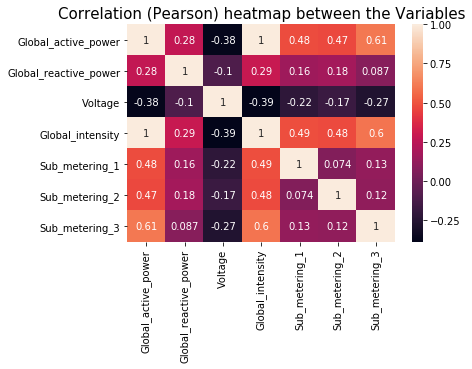

In [ ]:
#calculate and plot correlation of variables across entire dataframe
corr = data.corr(method ='pearson') #compute pearson's correlation coefficient
sns.heatmap(corr, annot=True) #set annot to True to show r score across map
plt.title('Correlation (Pearson) heatmap between the Variables', size = 15)

Global_active_power and Voltage are correlated to each other, and across the other variables.
Global_intensity also has a strong correlatin to the voltage
Perform mean comparison on *Global_active_power, and *Voltage

#### Check which of them is normally distributed

C:\Users\acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


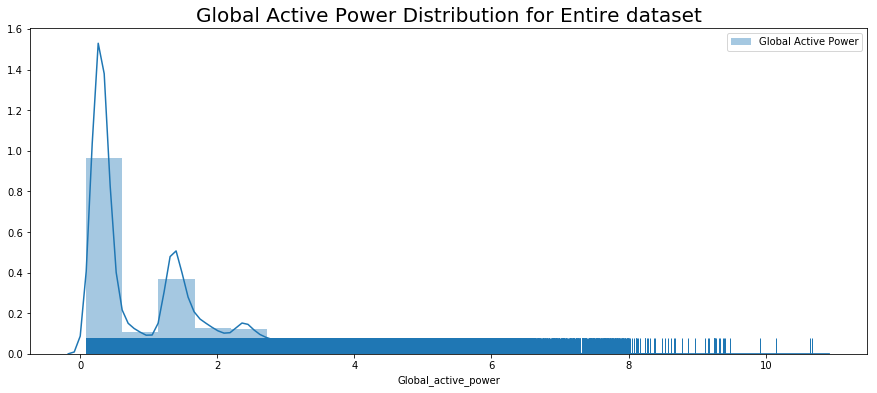

In [ ]:
#Plot distribution of Global_active_power for the whole dataset
fig = plt.figure(figsize=(15, 6))

#use dist plot to see distribution
sns.distplot(data['Global_active_power'], bins=20, rug=True, label='Global Active Power')

plt.title('Global Active Power Distribution for Entire dataset', size = 20) 
plt.legend()#show legend

Global Active Power data distribution has two peaks, is right-skewed, and has a long tail to the right.
The rugplot shows that the data has few outliers to the right, and there is little to no dispersion.

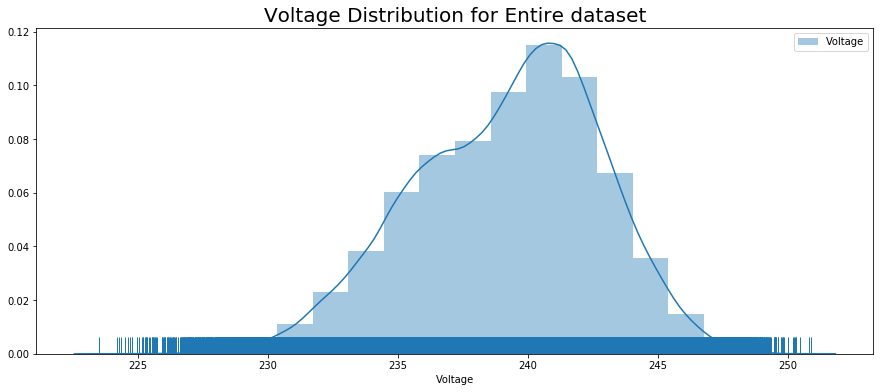

In [ ]:
#Plot distribution of voltage for the whole dataset
fig = plt.figure(figsize=(15, 6))
#use dist plot to see distribution
sns.distplot(data['Voltage'], bins=20, rug=True, label='Voltage')
plt.title('Voltage Distribution for Entire dataset', size = 20) 
plt.legend() #show legend

Voltage data distribution is normally distributed, and although left-skewed, the rugplot shows that the data has few outliers to the left and right, and the data is focused about the mean and median.

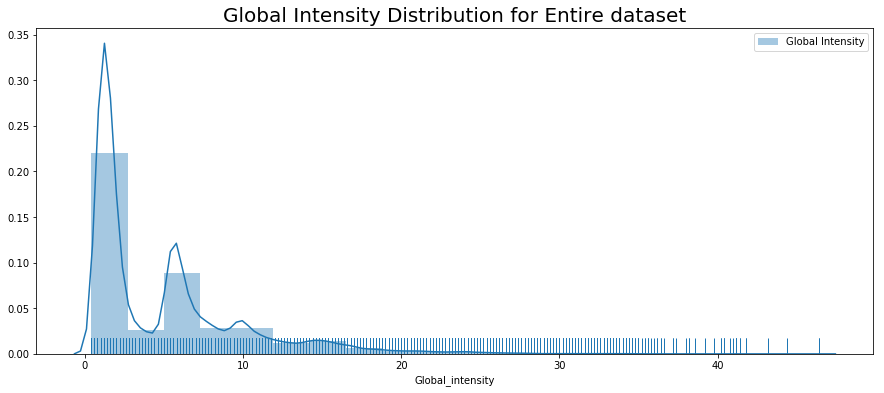

In [ ]:
#Plot distribution of voltage for the whole dataset
fig = plt.figure(figsize=(15, 6))
#use dist plot to see distribution
sns.distplot(data['Global_intensity'], bins=20, rug=True, label='Global Intensity')
plt.title('Global Intensity Distribution for Entire dataset', size = 20) 
plt.legend() #show legend

Global Intensity data distribution also has two peaks, is right-skewed, and has a long tail to the right.
The rugplot shows that the data is greatly dispersed across a wide range.

#### Use Voltage variable to test means and stds

Visualise Voltage Distribution for samples

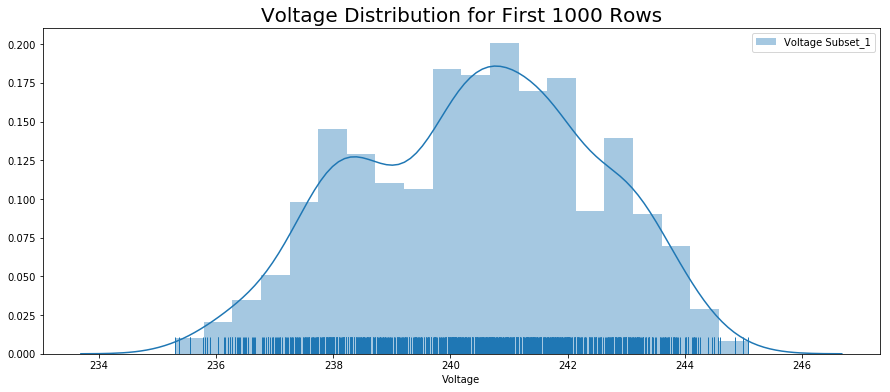

In [ ]:
#Plot distribution of voltage for the first sample
fig = plt.figure(figsize=(15, 6)) #Determine graph size
#plot a distribution plot, and allow kde and rug plots to be included with default histogram
sns.distplot(subset_1['Voltage'], bins=20, rug=True, label='Voltage Subset_1')
#set plot title
plt.title('Voltage Distribution for First 1000 Rows', size = 20) 
plt.legend() #show legend

In the above, the kde plot shows that voltage is still normally distributed, and the histogram shows the voltage to have about 3 peaks, 

The voltage data has a wide range and most of the data is centered around the mode and median

Although more symmetrically distributed than the distribution for whole data set, it's highest and lowest voltage values differs from the whole dataset.

C:\Users\acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


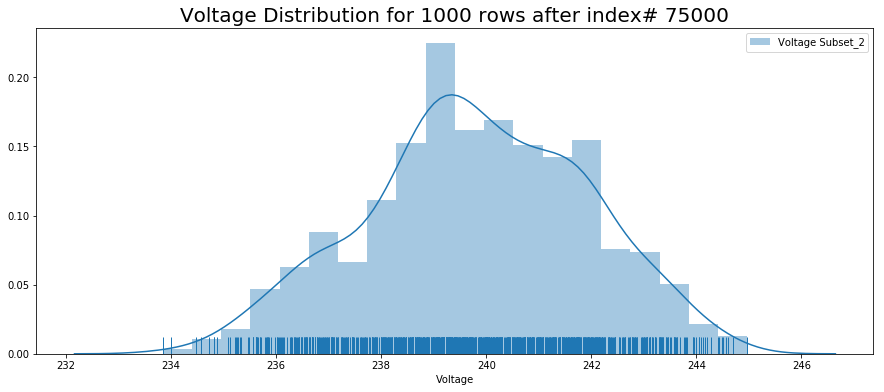

In [ ]:
#Plot distribution of voltage for the second sample
fig = plt.figure(figsize=(15, 6)) #Determine graph size
#plot a distribution plot, and allow kde and rug plots to be included with default histogram
sns.distplot(subset_2['Voltage'], bins=20, rug=True, label='Voltage Subset_2') 
#set plot title
plt.title('Voltage Distribution for 1000 rows after index# 75000', size = 20) 
plt.legend() #show legend

For the second sample, the histogram shows the voltage have about 2 peaks.
The kde plot shows it to be normally distributed, and a bit left-skewed; and from the rug plot, data is also centered about mode and median

Although more symmetrically distributed than the distribution for whole data set, it's highest and lowest voltage values differs from the whole dataset.

#### Basically, both voltage distributions from the samples are clearly different from the whole dataset.

##### Compute the voltage means for the datasets

In [ ]:
#Compute means for each dataset, for comparisons
#Voltage Variable

data_mean_v=data['Voltage'].mean() #Original data
ss1_mean_v=subset_1['Voltage'].mean() #subset_1 (first 1000 rows)
ss2_mean_v=subset_2['Voltage'].mean() #subset_2 (second 1000 rows from 75,000 index)

#print the results
print('\nMeans')
print('Data mean Voltage is', data_mean_v) 
print('Subset_1 mean Voltage is', ss1_mean_v)
print('Subset_2 mean Voltage is', ss2_mean_v)

print('')#leave a space in-between the two sets of results

#Compute Standard Deviations
data_std_v=data['Voltage'].std() #Original data
ss1_std_v=subset_1['Voltage'].std() #subset_1 (first 1000 rows)
ss2_std_v=subset_2['Voltage'].std() #subset_2 (second 1000 rows from 75,000 index)

#print the results
print('\nSTDs')
print('Data Voltage STD is', data_std_v) 
print('Subset_1 Voltage STD is', ss1_std_v)
print('Subset_2 Voltage STD is', ss2_std_v)


Means
Data mean Voltage is 239.20898076451763
Subset_1 mean Voltage is 240.42142000000032
Subset_2 mean Voltage is 239.81411999999966


STDs
Data Voltage STD is 3.5927933358960185
Subset_1 Voltage STD is 2.0119320699900007
Subset_2 Voltage STD is 2.10216962749031


There is a clear difference between the mean of the whole data, and the means of the subset samples.
Nevertheless, subsample_2 proves have values closer to the whole dataset than subset_1

The two samples are not good representations of the whole dataset.

In [ ]:
#Mean Difference with subset_1 (first 1000 rows) and provided data set
print('The sample difference between the data Voltage mean and subset_1 Voltage mean is \n', 
      abs(data_mean_v - ss1_mean_v))

print('')#Add space in-between results

#Mean Difference with subset_2 (1000 rows from index 75000) and provided data set
print('The sample difference between the data Voltage mean and subset_2 Voltage mean is \n ', 
      abs(data_mean_v - ss2_mean_v))

The sample difference between the data Voltage mean and subset_1 Voltage mean is 
 1.212439235482691

The sample difference between the data Voltage mean and subset_2 Voltage mean is 
  0.605139235482028


#### Use Hypothesis testing to conduct further investigation

#### The Hypothesis

$H_0: \mu = \overline{x}$, i.e., there is no difference between the mean values.

$H_1: \mu \neq \overline{x}$, i.e., there is a difference between the mean values.

#### compute Voltage mean differences for both samples

From the mean computations in the above, it is clearer that there are big differences between the samples and the whole dataset

#### Testing

I would like to use a One-sample t-test to investigate samples to see if any is a good representation of the whole dataset

I'll start by confirming sample distributions

Text(0.5, 1.0, 'Q-Qplot for Subset_1 Voltage')

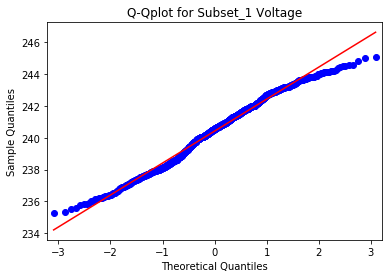

In [ ]:
#plot qqplot on subset_1 Voltage variable to confirm a normally distributed data

sub1_volt_data=subset_1['Voltage']

sm.qqplot(sub1_volt_data, 
          line='r') # include regression line
plt.title('Q-Qplot for Subset_1 Voltage')

Text(0.5, 1.0, 'Q-Qplot for Subset_2 Voltage')

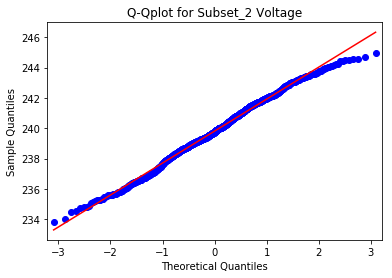

In [ ]:
#plot qqplot on subset_2 dataset for further confirmation of a normally distributed data

sub2_volt_data=subset_2['Voltage']

sm.qqplot(sub2_volt_data, 
          line='r') # include regression line
plt.title('Q-Qplot for Subset_2 Voltage')

 The points in the plots seem to fall about a straight line, and are not curved thus, I an go ahead with a one-sample t-test.

In [ ]:
#recal that voltage mean for the whole data set has already been earlier computed
# store whole dataset voltage mean in another variable
mu = data_mean_v 
mu

239.20898076451763

##### One-sample ttest

In [ ]:
sub1_volt_data=subset_1['Voltage'] # sample data subset_1

scs.ttest_1samp(a=sub1_volt_data,    
                 popmean=mu) # population mean

Ttest_1sampResult(statistic=19.05665487352422, pvalue=2.658066190872104e-69)

In [ ]:
sub2_volt_data=subset_2['Voltage'] # sample data subset_2

scs.ttest_1samp(a=sub2_volt_data,    
                 popmean=mu) # population mean

Ttest_1sampResult(statistic=9.103063143110177, pvalue=4.658286167831646e-19)

The Null hypothesis is rejected for subset_1 and subset_2 samples at p-values of 2.658066190872104e-69 and pvalue=4.658286167831646e-19 respectively. 

It is clear from all the above computations and visualizations that there are indeed differences between the samples and the whole dataset thus, the two samples are not good representations of the whole dataset.  

Create one new dataframe with the first 10,000 rows of data. 
Use random sampling to create a dataframe with 10,000 rows taken randomly from within the data and name it df_small. 
Is this a better representation of the dataset as a whole? If so, we can move on. If not, add more data or make other changes you feel are necessary.

In [ ]:
# Answer

Dataframe of first 10,000 rows of data

In [ ]:
subset_3=data.iloc[0:10000,] #Select first 10000 rows of data

In [ ]:
subset_3.count() #Compute number of rows for each variable to confirm

Date                     10000
Time                     10000
Global_active_power      10000
Global_reactive_power    10000
Voltage                  10000
Global_intensity         10000
Sub_metering_1           10000
Sub_metering_2           10000
Sub_metering_3           10000
Datetime                 10000
dtype: int64

Compare subset_3 with main data to see if it is a good representation

In [ ]:
#Compute and print means

#Compute stds of whole dataset
print('Whole data\n') #set a heading for differentiation
print(data_num.mean()) #compute mean across numeric variables entire dataframe

#compute mean for first 10000 rows
print('\nSubset_3\n')   #set a heading for differentiation
print(subset_3.mean()) #compute mean across entire dataframe

Whole data

Global_active_power        1.164937
Global_reactive_power      0.123729
Voltage                  239.208981
Global_intensity           4.974755
Sub_metering_1             1.332481
Sub_metering_2             1.670610
Sub_metering_3             5.831825
dtype: float64

Subset_3

Global_active_power        1.483666
Global_reactive_power      0.133779
Voltage                  240.906520
Global_intensity           6.261160
Sub_metering_1             0.585700
Sub_metering_2             1.752500
Sub_metering_3             5.274900
dtype: float64


Again use Voltage as done earlier

In [ ]:
#In Pure python
#Compute Standard Error of Voltage for df_small
std3=subset_3.std() #calculate std of sample

SE = std3['Voltage']/(math.sqrt(10000)) #Compute Standard Error
print ('The Standard Mean Error of Voltage in subset_3 sample is: \n', SE) #Print

The Standard Mean Error of Voltage in subset_4 sample is: 
 0.03350382341731096


The Standard Mean Error for voltage obtaied above is much smaller than was obtained for subset_1 and subset_2.

#### Hypothesis Testing to compare sample to Whole data

Just like was done with subset_1 and subset_2, I would like to use a One-sample t-test to investigate the sample to see if any is a good representation of the whole dataset.
Thus, I would also investigate the distribution of the voltage variable which I would also like to use.

Text(0.5, 1.0, 'Q-Qplot for Subset_3 Voltage')

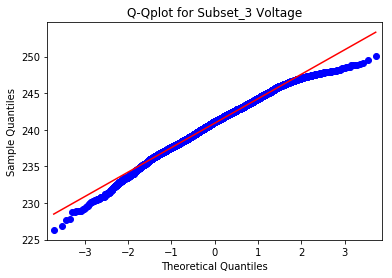

In [ ]:
#plot qqplot on subset_3 dataset for confirmation of a normally distributed data

sub3_volt_data=subset_3['Voltage']

sm.qqplot(sub3_volt_data, 
          line='r') # include regression line
plt.title('Q-Qplot for Subset_3 Voltage')

 The points in the above plots seem to fall about a straight line, and are not curved thus, I an go ahead with a one-sample t-test.

Conduct One-sample t-test

In [ ]:
#Compute One-sample t-test on Voltage for suset_3
sub3_volt_data=subset_3['Voltage'] # sample data subset_3

scs.ttest_1samp(a=sub3_volt_data,    
                 popmean=mu) # population mean

Ttest_1sampResult(statistic=50.66703027706506, pvalue=0.0)

This p-value is also less than 0.05. 
Null Hypothesis Rejected

#### Dataframe of Random Samples of 10,000 rows

In [ ]:
random=data.sample(n=10000)#collect a random sample of 10000 from dataset 
random.count()

Date                     10000
Time                     10000
Global_active_power      10000
Global_reactive_power    10000
Voltage                  10000
Global_intensity         10000
Sub_metering_1           10000
Sub_metering_2           10000
Sub_metering_3           10000
Datetime                 10000
dtype: int64

In [ ]:
#make df a csv file, define the path, and name it
random.to_csv(r'C:\Users\acer\Documents\Personal\ALU\AIIP\Start\DAV\Zips\Summative Assessment\random10000.csv', index=False) #index=False to avoid double indexing

In [ ]:
df_small = pd.read_csv('random10000.csv', sep=',') #read new random sample dataset

In [ ]:
#Compute and print means

#Compute stds of whole dataset
print('Whole data\n') #set a heading for differentiation
print(data_num.mean()) #compute mean across numeric variables entire dataframe

#compute mean for first 10000 rows
print('\nRandom Sample; df_small\n')   #set a heading for differentiation
print(df_small.mean()) #compute mean across entire dataframe

Whole data

Global_active_power        1.164937
Global_reactive_power      0.123729
Voltage                  239.208981
Global_intensity           4.974755
Sub_metering_1             1.332481
Sub_metering_2             1.670610
Sub_metering_3             5.831825
dtype: float64

Random Sample; df_small

Global_active_power        1.160838
Global_reactive_power      0.124553
Voltage                  239.223377
Global_intensity           4.956960
Sub_metering_1             1.229300
Sub_metering_2             1.714700
Sub_metering_3             5.807400
dtype: float64


df_small is a much better representation of the dataset as a whole, considering that the mean difference is very little.

In [ ]:
Use Voltage variable also

In [ ]:
#In Pure python
#Compute Standard Error of Voltage for df_small

std4=df_small.std() #calculate std of sample

SE = std4['Voltage']/(math.sqrt(10000)) #Compute Standard Error
('The Standard Mean Error of Voltage in df_small sample is: \n', SE)

('The Standard Mean Error of Voltage in df_small sample is: \n',
 0.035683653497081635)

The Standard Mean Error for voltage obtained above is much smaller than was obtained for subset_1 and subset_2, although very similar and even somewhat larger than was obtained for subset_3.

Just like was done with subset_1, subset_2, and subset_3, I would like to use a One-sample t-test to investigate the sample to see if any is a good representation of the whole dataset.
Thus, I would also investigate the distribution of the voltage variable which I would also like to use.

Text(0.5, 1.0, 'Q-Qplot for Random 10,000 data Voltage')

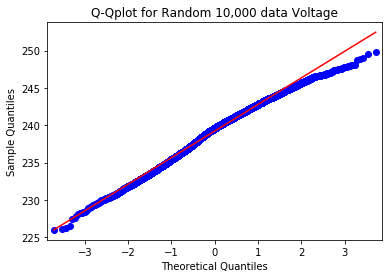

In [ ]:
#plot qqplot on the random samples dataset for confirmation of a normally distributed data

rand_volt_data=df_small['Voltage']

sm.qqplot(rand_volt_data, 
          line='r') # include regression line
plt.title('Q-Qplot for Random 10,000 data Voltage')

 The points seem to fall about a straight line, and are not curved thus, I an go ahead with a one-sample t-test.

Conduct One-sample t-test

In [ ]:
#Compute One-sample t-test on Voltage for suset_3
small_volt_data=df_small['Voltage'] # sample data subset_3

scs.ttest_1samp(a=small_volt_data,    
                 popmean=mu) # population mean

Ttest_1sampResult(statistic=0.4034406253704669, pvalue=0.6866327323190946)

This sample produces a p-value higher than 0.05! The Null Hypothesis that the mean of this sample is equal to the mean of the population is therefore accepted!

## Accepted!!!

## Task 3: Correlation and Plotting

Explore the correlation of various features in the graph. Plot some scatterplots showing the features with the highest correlation coeficient, and some for those with the lowest correlation coeficient. 

- Name two pairs of highly correlated variables. 
- Produce at least three scatter plots.

### Answer:

In [ ]:
#corr = data.corr()
#plt.figure(figsize=(16, 10))
#sns.heatmap(corr,  
 #           linewidths=.08,                   # set linewidth between entries in matrix
  #         cbar_kws={"shrink": .9})           # set length of legend on right


Text(0.5, 1.0, 'Correlation (Pearson) heatmap between the Variables')

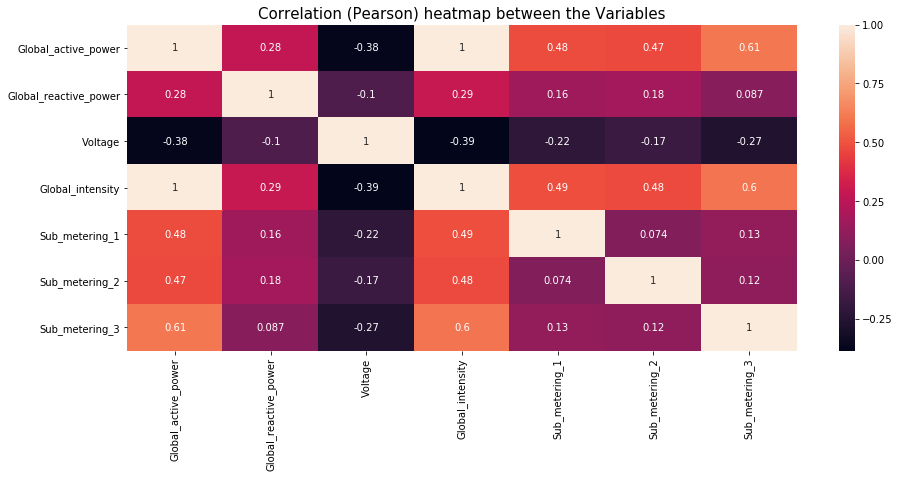

In [ ]:
fig = plt.figure(figsize=(15, 6))
#calculate and plot correlation of variables across entire dataframe
corr = data.corr(method ='pearson') #compute pearson's correlation coefficient
sns.heatmap(corr, annot=True) #set annot to True to show r score across map
plt.title('Correlation (Pearson) heatmap between the Variables', size = 15)

The correlation color codes, as well as the Pearson Correlation coefficient values for each pair, are easily observed in the heatmap above.

_Positive Correlation_:
-Global_active_power and Global_intensity are extremely highly, and the highest correlated to each other, with an r value of +1.
-Second to the above pair is Sub-metering_3 and Global_active_power, with an r value of +0.61.
    
_Negative Correlation_:
-Global_active_power and Voltage are the highest negative correlated to each other, with an r value of -0.38.

_Low-No Correlation_:
-There is extremely low correlation between Sub-metering_1 and Sub-metering_2, with an r value of 0.074.
-Also exists, an extremely low correlation between Sub-metering_3 and Global_reactive_power, with an r value of 0.087


(0.9989980149140137, 0.0)


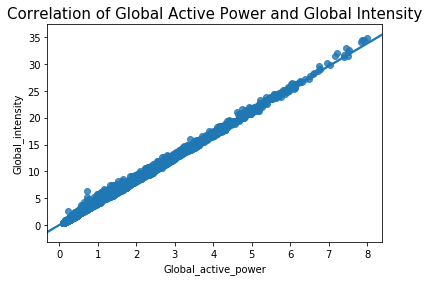

In [ ]:
#regplot of Global_active_power and Global_intensity
sns.regplot(df_small['Global_active_power'], df_small['Global_intensity'])
#set plot title
plt.title('Correlation of Global Active Power and Global Intensity', size = 15) 

#compute and print pearson's corr.
print(scs.pearsonr(df_small['Global_active_power'], df_small['Global_intensity']))

Using the direction of the trend line from the scatterplot above, there's an almost perfect positive relationship between Global Active Power and Global Intensity. This has been confirmed by their correlation coefficient, r of 0.998.

(0.6133882638531758, 0.0)


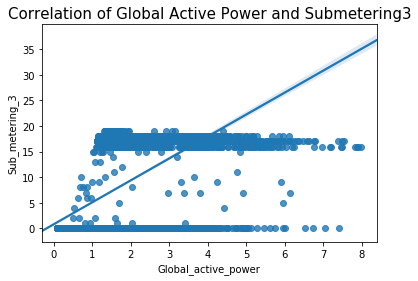

In [ ]:
#regplot of Global_active_power and Sub_metering_3
sns.regplot(df_small['Global_active_power'], df_small['Sub_metering_3'])
#set plot title
plt.title('Correlation of Global Active Power and Submetering3', size = 15) 

#compute and print pearson's corr.
print(scs.pearsonr(df_small['Global_active_power'], df_small['Sub_metering_3']))

Using the direction of the trend line from the scatterplot above, there's a moderately positive relationship between Global Active Power and Submetering3. This has been confirmed by their correlation coefficient, r of 0.613.

(-0.3711160751392412, 5e-324)


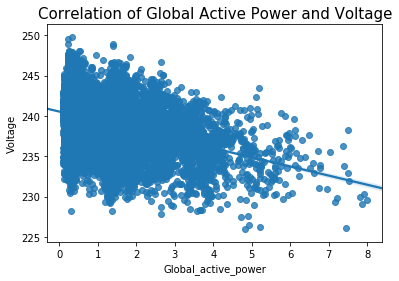

In [ ]:
#regplot of Global_active_power and Voltage
sns.regplot(df_small['Global_active_power'], df_small['Voltage'])
#set plot title
plt.title('Correlation of Global Active Power and Voltage', size = 15) 

#compute and print pearson's corr.
print(scs.pearsonr(df_small['Global_active_power'], df_small['Voltage']))

Using the direction of the trend line from the scatterplot above, there's a moderately negative relationship between Global Active Power and Voltage. This has been confirmed by their correlation coefficient, r of -0.371.

(0.08781746006304796, 1.3971305679217792e-18)


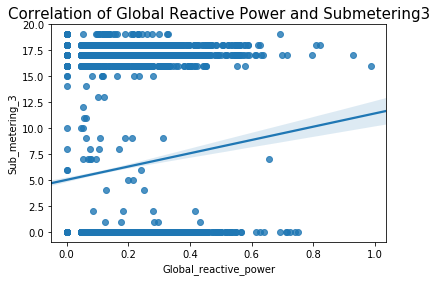

In [ ]:
#regplot of Global_reactive_power and Sub_metering_3
sns.regplot(df_small['Global_reactive_power'], df_small['Sub_metering_3'])

#set plot title
plt.title('Correlation of Global Reactive Power and Submetering3', size = 15) 

#compute and print pearson's corr.
print(scs.pearsonr(df_small['Global_reactive_power'], df_small['Sub_metering_3']))

Using the direction of the trend line from the scatterplot above, there's a very slightly positive relationship between Global Reactive Power and Submetering3. This has been confirmed by their correlation coefficient, r of 0.0871.

## Task 4: Simple Linear Regression

Find the parameters of a simple linear model with Global_intensity as the explanatory variable and Global_active_power as the dependent variable

- Print out the model parameters and score

### Answer:

In [ ]:
# Build a simple model and find parameters, as well as the R-Squared Value

Make use of Random Sample data that fits the whole dataset, for speed

In [ ]:
Explanatory: Global_intensity
Dependent: Global_active_power

(0, 12)

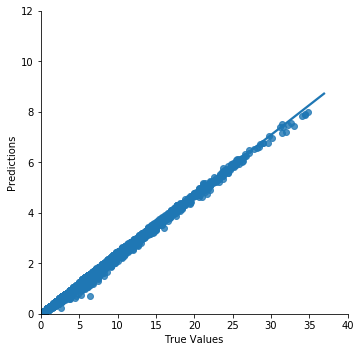

In [ ]:
#View linear relationship of the two variables
g = sns.lmplot(x='Global_intensity', y='Global_active_power', data=df_small)
plt.xlabel ('True Values')
plt.ylabel ('Predictions')

axes = g.axes
axes[0,0].set_xlim(0,40)
axes[0,0].set_ylim(0, 12)

The plot above shows a positive linear relationship between the Global Intensity and the Global Active Power

In [ ]:
#declare variables to use for model
X = df_small['Global_intensity']
y = df_small['Global_active_power']

####To understand model performance, divide dataset intoa Training Set and a Test Set
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 

#see new data sizes
print ('Training data: ', X_train.shape, y_train.shape)
print ('Test data: ', X_test.shape, y_test.shape)

Training data:  (8000,) (8000,)
Test data:  (2000,) (2000,)


##### fit a model

In [ ]:
#using statsmodel 

#using the Ordinary Least Squares Method
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)#make preditions by this model

#print statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Global_active_power   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 7.674e+06
Date:                 Fri, 12 Apr 2019   Prob (F-statistic):               0.00
Time:                         22:18:19   Log-Likelihood:                 12116.
No. Observations:                 8000   AIC:                        -2.423e+04
Df Residuals:                     7999   BIC:                        -2.422e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Global_intensity     0.2353   8.49e-05   2770.271      0.000       0.235       0.235
==============================================================================
Omnibus:                     3786.112   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40836.667
Skew:                          -1.998   Prob(JB):                         0.00
Kurtosis:                      13.322   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Retrive Intercept and Coefficient values
#print('Intercept:', model.intercept_)
#print('Coefficients', model.coef_)

print('')

#compute and print scores
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 0.03457376416174687
Mean Squared Error: 0.0026924143198200435
Root Mean Squared Error: 0.05188847964452267


In [ ]:
#Alternate Code
#Plot the model
# #plt.scatter(y_test, predictions)
# #plt.xlabel ('True Values')
# #plt.ylabel ('Predictions')

Slope is: 0.995994    
Intercept is: 0.010937
r-squared: 0.998059


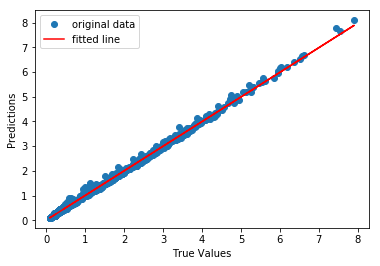

In [ ]:
#Plot a Linear Regression
slope, intercept, r_value, p_value, std_err = scs.linregress(y_test, predictions)

#print slope and intercept
print("Slope is: %f    \nIntercept is: %f" % (slope, intercept)) 

#Get the coefficient of determination (r_squared):
print("R-squared Value is: %f" % r_value**2)

#Plot the data along with the fitted line:
plt.plot(y_test, predictions, 'o', label='original data')
line_x = np.arange(X_test.min(), X_test.max())
plt.plot(y_test, intercept + slope*y_test, 'r', label='fitted line')
plt.xlabel ('True Values')
plt.ylabel ('Predictions')
plt.legend()
plt.show()

The R-Squared value of 0.99 means that 99% of the variance in Global Active Power is explained by the Global Intensity. This model is a good fit.

## Task 5: Regression, but harder this time

You didn't think it was going to be that easy? Intensity and power are different measures of essentially the same thing. We want to predict power from the other readings - a much harder task.

Tasks: 
- Predict the power based on as many of the other factors as you think necessary. As before, print out model parameters and the score, both when using the model on your sample and when running it (i.e. score()) over the whole dataset.

### Answer:

After studying dataset, it is observed that the 3 Submetering zones provided do not capture the entire division for power usage in the household 

Ohm's Law: Power = Voltage x Current

### Using Sample data

In [ ]:
#declare variables to use for model
X = df_small[['Global_intensity', 'Voltage']].values
y = df_small['Global_active_power'].values

####To understand model performance, divide dataset intoa Training Set and a Test Set
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) 

#see new data sizes
print ('Training data: ', X_train.shape, y_train.shape)
print ('Test data: ', X_test.shape, y_test.shape)

Training data:  (8000, 2) (8000,)
Test data:  (2000, 2) (2000,)


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
#do prediction on test data
y_pred = regressor.predict(X_test)

In [ ]:
#Retrive Intercept and Coefficient values
print('Intercept:', regressor.intercept_)
print('Coefficients', regressor.coef_)

print('')

#compute and print scores
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Intercept: -0.9611596713343662
Coefficients [0.23751669 0.00394983]

Mean Absolute Error: 0.034748823106245115
Mean Squared Error: 0.002692185213153012
Root Mean Squared Error: 0.05188627191418759


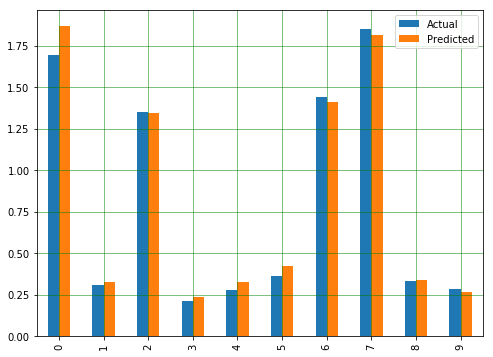

In [ ]:
#see differences between actual values and predicted values
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1=df.head(10)

#Plot comparison of Actual and Predicted values
df1.plot(kind='bar', figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

### Repeat Using Whole Dataset

In [ ]:
#declare variables to use for model
X = data[['Global_intensity', 'Voltage']].values
y = data['Global_active_power'].values

####To understand model performance, divide dataset intoa Training Set and a Test Set
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) 

#see new data sizes
print ('Training data: ', X_train.shape, y_train.shape)
print ('Test data: ', X_test.shape, y_test.shape)

Training data:  (205495, 2) (205495,)
Test data:  (51374, 2) (51374,)


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
#do prediction on test data
y_pred = regressor.predict(X_test)

In [ ]:
#Retrive Intercept and Coefficient values
print('Intercept:', regressor.intercept_)
print('Coefficients', regressor.coef_)

print('')

#compute and print scores
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Intercept: -1.0005887958181665
Coefficients [0.23730477 0.00411791]

Mean Absolute Error: 0.035354336668849545
Mean Squared Error: 0.002676313579654173
Root Mean Squared Error: 0.05173309945918737


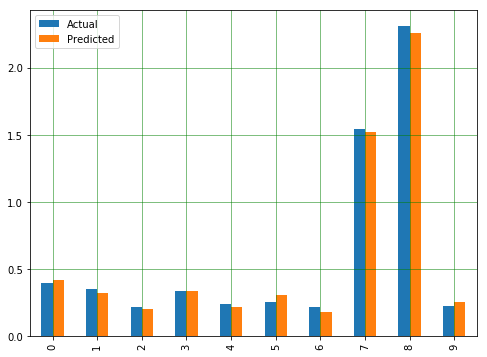

In [ ]:
#see differences between actual values and predicted values
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1=df.head(10)

#Plot comparison of Actual and Predicted values
df1.plot(kind='bar', figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [ ]:
#using statsmodel 

#using the Ordinary Least Squares Method
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)#make preditions by this model

#print statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.945e+07
Date:                Fri, 12 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:15:51   Log-Likelihood:             3.1120e+05
No. Observations:              205495   AIC:                        -6.224e+05
Df Residuals:                  205493   BIC:                        -6.224e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2361   2.34e-05   1.01e+04      0.000       0.236       0.236
x2         -3.937e-05   6.88e-07    -57.215      0.000   -4.07e-05    -3.8e-05
==============================================================================
Omnibus:                   114109.384   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1820163.420
Skew:                          -2.337   Prob(JB):                         0.00
Kurtosis:                      16.810   Cond. No.                         47.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is very little difference with the Root Mean Squared error, using the whole dataset and when using the sample
The models obtained using the two datasets are very similar in values

## Task 6 - Logistic Regression

Use logistic regression to predict occasions when Sub_metering_1 is greater than Sub_metering_2 - in other words, when is the kitchen more in use then the laundry room? 
Tasks: 
- Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not. 
- Build a logistic regression model with this as the dependant variable. Use any variables as inputs.
- How did your model score? Briefly comment with your thoughts. Do you think this is something one could feasibly predict from the available data?

##### Add a column with a 1 when kitchen power is higher than laundry room (sub_metering_1>2) and a 0 when not.

In [ ]:
#compute difference and save in new column
data['Difference'] = data['Sub_metering_1']-data['Sub_metering_2']

In [ ]:
data["usage_code"] = "" #create an empty column to hold new values

In [ ]:
data.loc[(data['Difference'] > 0.0),'usage_code'] = 1
data.loc[(data['Difference'] <= 0.0),'usage_code'] = 0

In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Difference,usage_code
Datetime,,,,,,,,,,,,
2007-01-01 00:00:00,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00,0.0,0
2007-01-01 00:01:00,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00,0.0,0
2007-01-01 00:02:00,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00,0.0,0
2007-01-01 00:03:00,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00,0.0,0
2007-01-01 00:04:00,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00,0.0,0


##### Build a logistic regression model with this as the dependant variable. Use any variables as inputs.

In [ ]:
#declare variables to use for model
x = data['Difference'].values
y = data['usage_code'].values #dependent variable

####To understand model performance, divide dataset intoa Training Set and a Test Set
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0) 

#see new data sizes
print ('Training data: ', x_train.shape, y_train.shape)
print ('Test data: ', x_test.shape, y_test.shape)

Training data:  (205495,) (205495,)
Test data:  (51374,) (51374,)


In [ ]:
logreg = LogisticRegression()
#X = np.array(PP).reshape(-1, 1)
logreg.fit(x_train.reshape(-1, 1), y_train)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
#do prediction on test data
y_prediction = logreg.predict(x_test.reshape(-1, 1))

In [ ]:
#Retrive Intercept and Coefficient values
print('Intercept:', logreg.intercept_)
print('Coefficients', logreg.coef_)

print('')

#compute and print scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

Intercept: [-8.61132937]
Coefficients [[14.5267889]]

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


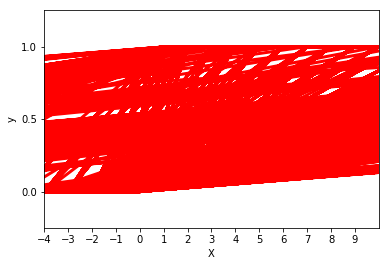

In [ ]:
def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(x_test * logreg.coef_ + logreg.intercept_).ravel()
plt.plot(x_test, loss, color='red', linewidth=3)

#ols = linear_model.LinearRegression()
#ols.fit(X, y)
#plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
#plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
#plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           #loc="lower right", fontsize='small')
plt.show()

## Task 7 - Visualizations and conclusions

Well done! You're almost through. Now for some final easy points, pick three of the following questions and create a visualization and some text to answer the question:
- What time of day is the kitchen used?
- Does the weekly power consumption remain constant?
- Which sub-metering zone used the most power?
- How did power use in the different zones change over time?
- How did the two small subsamples you created in the beginning (1000 rows each) differ?

For better analysis, convert to time series - use datetime as index

In [ ]:
data.index = data['Datetime'] #set datetime column as index

### 1. Does the weekly power consumption remain constant?

Text(0.5, 0, 'Months')

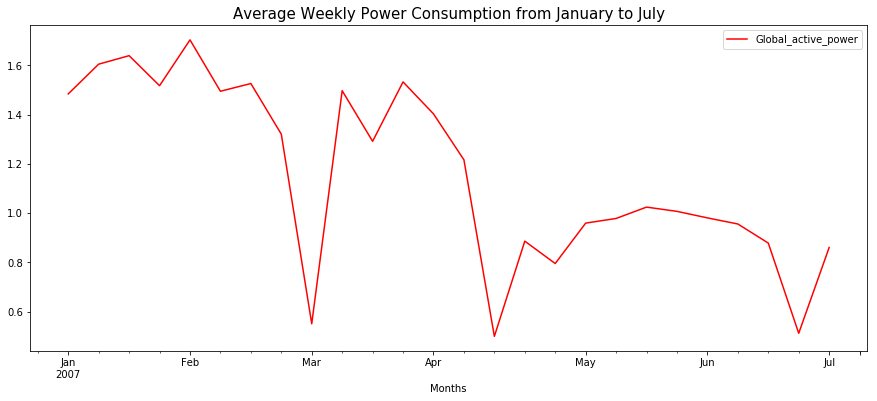

In [ ]:
# resampling over week for each month and computing mean
fig = plt.figure(figsize=(15, 6))#set graph size
data.Global_active_power.resample('W').mean().plot(color='r', legend=True)

#set plot title
plt.title('Average Weekly Power Consumption from January to July', size = 15)
plt.xlabel('Months')

The plot above clearly shows that the weekly power consumption does not remain constant across the months.

Text(0.5, 1.0, 'Average Weekly Power Consumption from January to July')

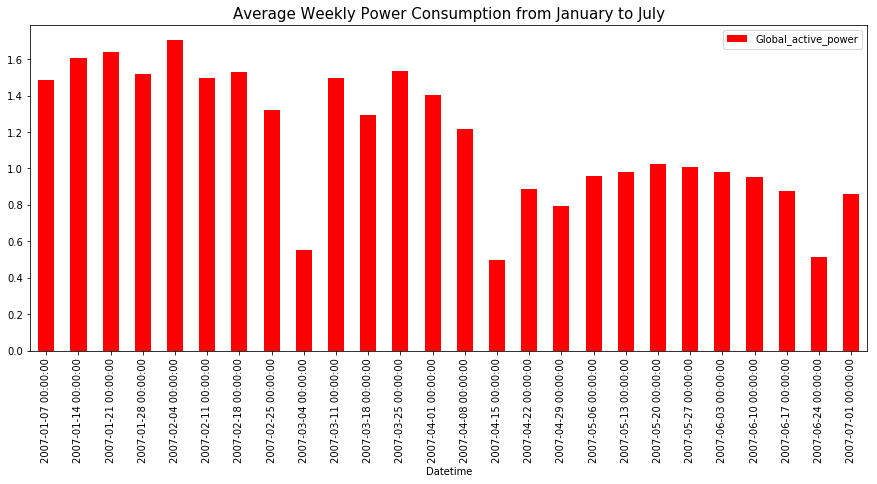

In [ ]:
# resampling over week for each month and computing mean
fig = plt.figure(figsize=(15, 6))#set graph size
#Plot mean sampled per week for all months
data.Global_active_power.resample('W').mean().plot(kind='bar', color='r', legend=True)

#set plot title
plt.title('Average Weekly Power Consumption from January to July', size = 15)

The plots above clearly show that the weekly power consumption does not remain constant across the months; from January up till June.

In [ ]:
#Group data by months
Jan = data['2007-01-01':'2007-01-31']
Feb = data['2007-02-01':'2007-02-28']
Mar = data['2007-03-01':'2007-03-31']
April = data['2007-04-01':'2007-04-30']
May = data['2007-05-01':'2007-05-31']
June = data['2007-06-01':'2007-06-30']

Text(0.5, 0, 'June(weekly)')

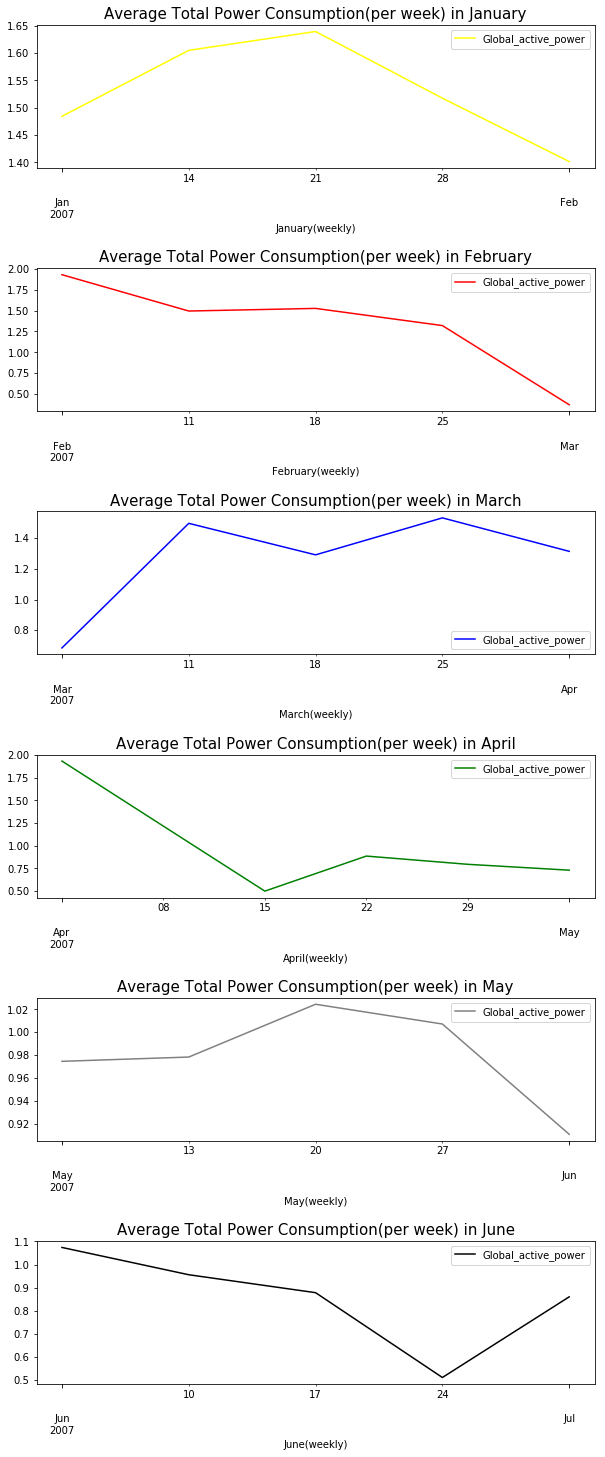

In [ ]:
## resampling over week and computing means
fig, ax=plt.subplots(6,1, figsize=(10,25)) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)#add space between subplots

Jan.Global_active_power.resample('W').mean().plot(color='yellow', ax=ax[0], legend=True)
Feb.Global_active_power.resample('W').mean().plot(color='red', ax=ax[1], legend=True)
Mar.Global_active_power.resample('W').mean().plot(color='blue', ax=ax[2], legend=True)
April.Global_active_power.resample('W').mean().plot(color='green', ax=ax[3], legend=True)
May.Global_active_power.resample('W').mean().plot(color='grey', ax=ax[4], legend=True)
June.Global_active_power.resample('W').mean().plot(color='black', ax=ax[5], legend=True)

#Set plot titles for each graph
ax[0].set_title('Average Total Power Consumption(per week) in January', size = 15)
ax[1].set_title('Average Total Power Consumption(per week) in February', size = 15)
ax[2].set_title('Average Total Power Consumption(per week) in March', size = 15)
ax[3].set_title('Average Total Power Consumption(per week) in April', size = 15)
ax[4].set_title('Average Total Power Consumption(per week) in May', size = 15)
ax[5].set_title('Average Total Power Consumption(per week) in June', size = 15)

#set plot x-axis labels 
ax[0].set_xlabel('January(weekly)')
ax[1].set_xlabel('February(weekly)')
ax[2].set_xlabel('March(weekly)') 
ax[3].set_xlabel('April(weekly)')
ax[4].set_xlabel('May(weekly)')
ax[5].set_xlabel('June(weekly)')

The plots above show clearly that even within each month, the weekly power consumption does not remain constant.

Generally, the weekly power consumption is not constant

### 2. Which submetering zone used the most power?

In [ ]:
#Compute sums
print ('Submetering 1 zone used a total of ', (data['Sub_metering_1'].sum()), 'watts, from January to June')
print ('Submetering 2 zone used a total of ', (data['Sub_metering_2'].sum()), 'watts, from January to June')
print ('Submetering 3 zone used a total of ', (data['Sub_metering_3'].sum()), 'watts, from January to June')

Submetering 1 zone used a total of  342273.0 watts, from January to June
Submetering 2 zone used a total of  429128.0 watts, from January to June
Submetering 3 zone used a total of  1498015.0 watts, from January to June


Submetering 3 zone used the most power.

##### Visualise in Ascending Order

Text(0.5, 0, 'Months(per week)')

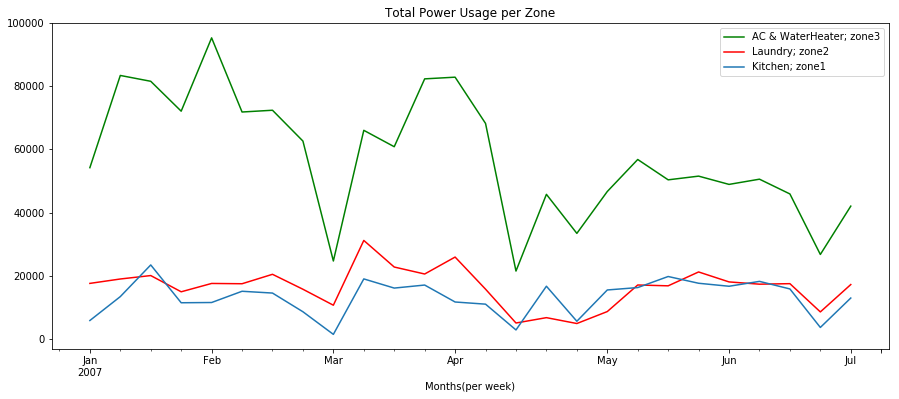

In [ ]:
fig = plt.figure(figsize=(15, 6))#set graph size
#Submetering1 Zone
data.Sub_metering_3.resample('W').sum().plot(title='Total Power Usage per Zone', color='green', label='AC & WaterHeater; zone3') 
#plt.tight_layout() #comment out to combine all graph into one
plt.legend()

#Submetering2 Zone
data.Sub_metering_2.resample('W').sum().plot(color='red', label='Laundry; zone2') 
#plt.tight_layout() #comment out to combine all graph into one
plt.legend()

#Submetering3 Zone
data.Sub_metering_1.resample('W').sum().plot(label='Kitchen; zone1') 
#plt.tight_layout() #comment out to combine all graph into one
plt.legend()

plt.xlabel('Months(per week)')
#IGNORE
#Submetering2 Zone
#data.Sub_metering_2.resample('W').sum().plot(title='Total Global_active_power Submetering2 Zone', color='red', label='Submetering1') 
#plt.tight_layout() 
#plt.legend()


The above graph shows that submetering3 zone had the highest power usage over the entire 6 months.

### 3. How did power use in the different zones change over time?

##### Average Power Usage over _Months_

Text(0.5, 0, 'Month')

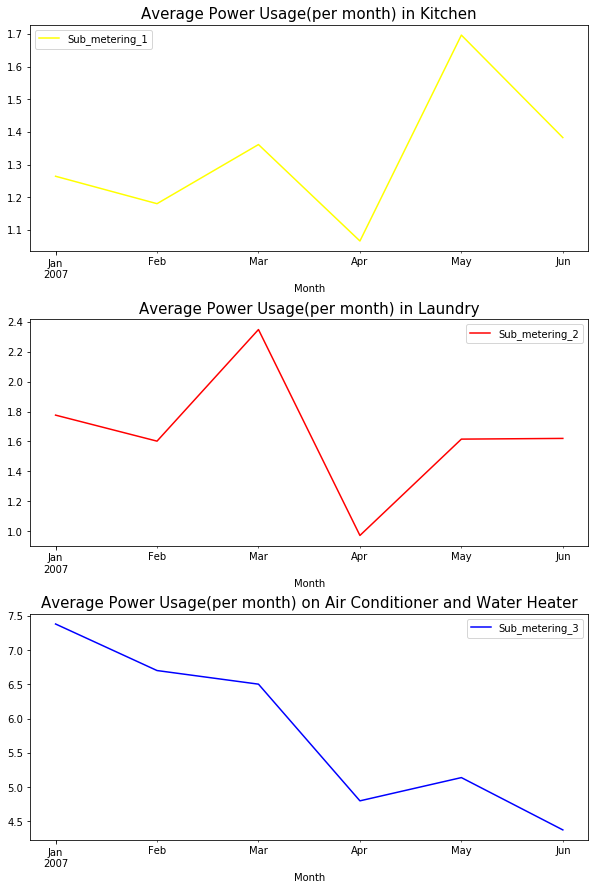

In [ ]:
## resampling over week and computing means
fig, ax=plt.subplots(3,1, figsize=(10,15)) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)#add space between subplots


data.Sub_metering_1.resample('M').mean().plot(color='yellow', ax=ax[0], legend=True)
data.Sub_metering_2.resample('M').mean().plot(color='red', ax=ax[1], legend=True)
data.Sub_metering_3.resample('M').mean().plot(color='blue', ax=ax[2], legend=True)

#Set plot titles for each graph
ax[0].set_title('Average Power Usage(per month) in Kitchen', size = 15)
ax[1].set_title('Average Power Usage(per month) in Laundry', size = 15)
ax[2].set_title('Average Power Usage(per month) on Air Conditioner and Water Heater', size = 15)

#set plot x-axis labels 
ax[0].set_xlabel('Month')
ax[1].set_xlabel('Month')
ax[2].set_xlabel('Month')

From the above plots, the average monthly power usage in the three zones are different, over the six months - from January to June.

_In the Kitchen_, 
the average usage is low in January, and is even much lower in February.
There is an increase in average usage in March, but this dips extremely in April to a very low point in comparison.
By May, we observe a relatively very high peak in average usage, and this reduces by the month of June
Nevertheless, the average power usage in June is still higher than that of January.

_In the Laundry_,
The general average power usage is much higher than in the Kitchen.
The average power usage reduces in February in comparison with the month of January, but there is a hike in March.
In April, the average power usage dips extremely, but this increases in May, although, not as high as in January or February.
The average power usage is roughly the same as in May, for June.

_AC & Water Heater_,
Generally, this zone has the highest power usage in the household
Nevertheless, the average power usage in this zone is on a steady decline
These equipment are on an average, used a whole lot in January, and the least in June.
There is a slight increase in value in May, from the low usage in April.

##### Analysing deeper, for submetering 1 zone

##### Average Power usage over Weeks each month

Text(0.5, 0, 'June(weekly)')

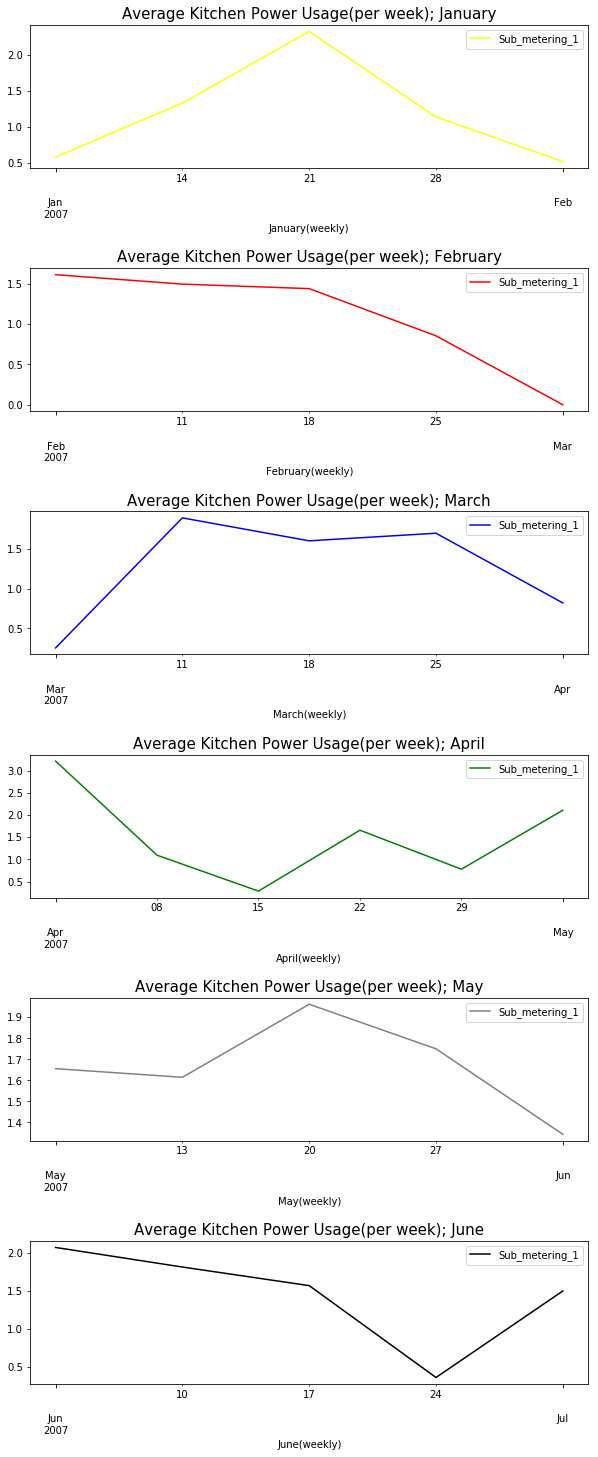

In [ ]:
## resampling over week and computing means
fig, ax=plt.subplots(6,1, figsize=(10,25)) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)#add space between subplots

Jan.Sub_metering_1.resample('W').mean().plot(color='yellow', ax=ax[0], legend=True)
Feb.Sub_metering_1.resample('W').mean().plot(color='red', ax=ax[1], legend=True)
Mar.Sub_metering_1.resample('W').mean().plot(color='blue', ax=ax[2], legend=True)
April.Sub_metering_1.resample('W').mean().plot(color='green', ax=ax[3], legend=True)
May.Sub_metering_1.resample('W').mean().plot(color='grey', ax=ax[4], legend=True)
June.Sub_metering_1.resample('W').mean().plot(color='black', ax=ax[5], legend=True)

#Set plot titles for each graph
ax[0].set_title('Average Kitchen Power Usage(per week); January', size = 15)
ax[1].set_title('Average Kitchen Power Usage(per week); February', size = 15)
ax[2].set_title('Average Kitchen Power Usage(per week); March', size = 15)
ax[3].set_title('Average Kitchen Power Usage(per week); April', size = 15)
ax[4].set_title('Average Kitchen Power Usage(per week); May', size = 15)
ax[5].set_title('Average Kitchen Power Usage(per week); June', size = 15)

#set plot x-axis labels 
ax[0].set_xlabel('January(weekly)')
ax[1].set_xlabel('February(weekly)')
ax[2].set_xlabel('March(weekly)') 
ax[3].set_xlabel('April(weekly)')
ax[4].set_xlabel('May(weekly)')
ax[5].set_xlabel('June(weekly)')

The above plots shows that the kitchen wasn't used in the same way every month;

In January, It was used more in the third week than in every other week.

In February, the power usage started at a peaks, but was on a slight decline, and dipped after the 3rd week. It shows that it was almost not used at all on the last day in February.

And so, March starts off at a very low rate, but on a steady assent; it is used much more in the 2nd, 3rd and 4th weeks, and the use is declined again towards the end of March (minimal usage)

The first week of April has the highest usage, but the kitchen is very minimally used by the 3rd week. It is used quite as much as in the first week of February by the 3rd week, and increases even much more towards the end of April

In May, the kitchen is used just quite well, in comparison to the other months at the beginning, and has its peak usage by the 3rd week. Nevertheless, power usage experiences a steady deline until its minimum usage towards the end of the month.

In the first week of June, power usage picks up more than in May, but is on a steady decline till the 3rd week, and a sharp decline to its minimum level by the 4th week. Power usage picks up towards the end of the month to the general average usage aross all zones.

##### Average Power usage over Weeks in January for all zones

Text(0.5, 0, 'March(weekly)')

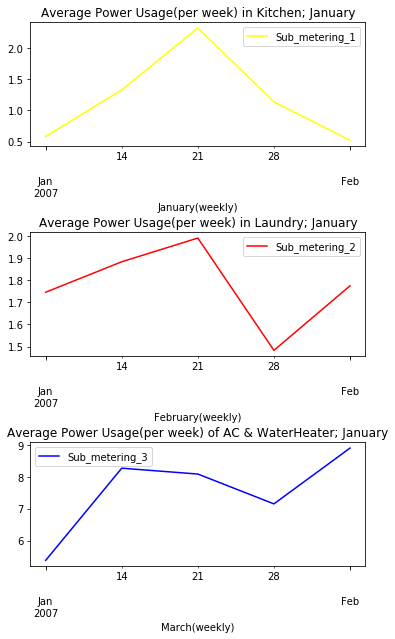

In [ ]:
## resampling over week and computing means
fig, ax=plt.subplots(3,1, figsize=(6,10)) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)#add space between subplots

Jan.Sub_metering_1.resample('W').mean().plot(color='yellow', ax=ax[0], legend=True)
Jan.Sub_metering_2.resample('W').mean().plot(color='red', ax=ax[1], legend=True)
Jan.Sub_metering_3.resample('W').mean().plot(color='blue', ax=ax[2], legend=True)


#Set plot titles for each graph
ax[0].set_title('Average Power Usage(per week) in Kitchen; January', size = 12)
ax[1].set_title('Average Power Usage(per week) in Laundry; January', size = 12)
ax[2].set_title('Average Power Usage(per week) of AC & WaterHeater; January', size = 12)

#set plot x-axis labels 
ax[0].set_xlabel('January(weekly)')
ax[1].set_xlabel('February(weekly)')
ax[2].set_xlabel('March(weekly)') 

Again, the kitchen usage in January peaks at the third week, after minimal usage in the first week, but dips again to minimal usage towards the end of the month

The use of the Laundry in January was on a steady increase and peaked in the third week, but experiences a sharp decline by the fourth week. It is used much moree again in the last few days of the month

From the graphs above, the AC & WaterHeater used more power than all other zones in the house. It has its lowest usage in the first week of January, and steadily increases up till the second week. Its use reduces just a little up until the fourth week, and the is an increase in the last few days of the month.



#### Average usage in first week of January for all zones

In [ ]:
import datetime as dt
range_min = data['Datetime'].min()
range_max = range_min + dt.timedelta(days=8)

In [ ]:
# It's nice seeing day of the week as a word - so I'll add that as a column
import calendar
data['Day_name'] = [calendar.day_name[x] for x in data.Datetime.dt.dayofweek]

In [ ]:
week1 = data.loc[(range_min < data['Datetime']) & (range_max > data['Datetime'])]

Text(0.5, 0, 'January(Week1; daily)')

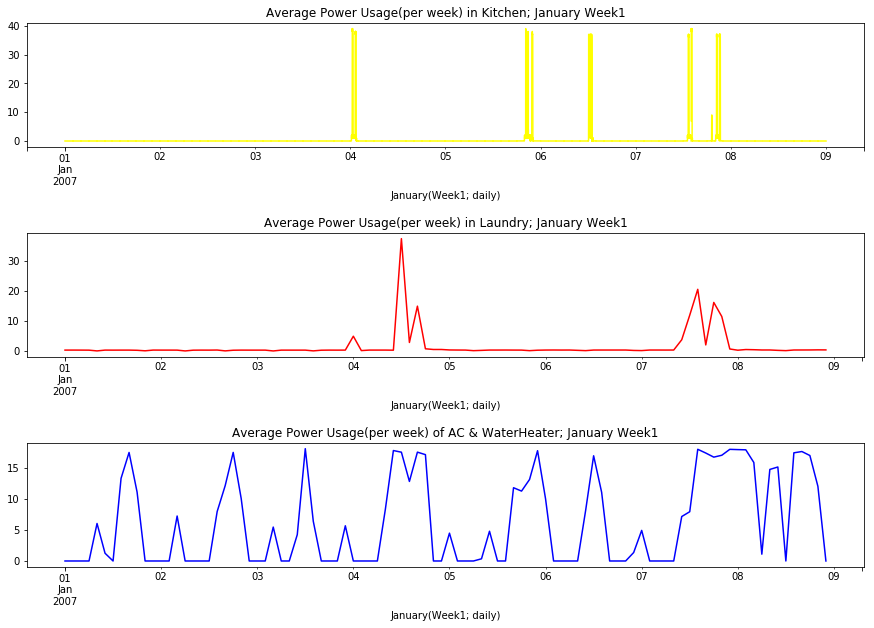

In [ ]:
fig, ax=plt.subplots(3,1, figsize=(15,10)) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.7)#add space between subplots

## resampling per 2hours, over 1 week
week1.Sub_metering_1.resample('2H').plot(color='yellow', ax=ax[0])
week1.Sub_metering_2.resample('2H').mean().plot(color='red', ax=ax[1])
week1.Sub_metering_3.resample('2H').mean().plot(color='blue', ax=ax[2])


#Set plot titles for each graph
ax[0].set_title('Average Power Usage(per week) in Kitchen; January Week1', size = 12)
ax[1].set_title('Average Power Usage(per week) in Laundry; January Week1', size = 12)
ax[2].set_title('Average Power Usage(per week) of AC & WaterHeater; January Week1', size = 12)

#set plot x-axis labels 
ax[0].set_xlabel('January(Week1; daily)')
ax[1].set_xlabel('January(Week1; daily)')
ax[2].set_xlabel('January(Week1; daily)') 

In the first week of January:

    The Kitchen was not used for the first 3 days. It was used at a very high peak (even as compared with the other zones) at the beginning of the 4th day. It is not used for the rest of the 4th day up till the end of the 5th day when it is also used at a peak. It is also used at a peak midday 6th day, and midday 7th day; also in the evening.
    
    The Laundry was used extremely minimally for the first 3 days in January, and from the last hours of the 4th day of to the early mornings of the 7th day. It is used quite ok for the rest of the day on the 7th day. 
    
    The ACs and WaterHeaters are in use steadily over the entire week. The zone has its peak usages at middays and its low power usage in the early hours of the days. 

In conclusion, the power usage over time in the 3 zones are different within and across them.